In [34]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [35]:
df = pd.read_csv("airlines.csv")

In [36]:
#1.1
X = df[['FlightLength', 'DailyFlightTime']]
y = df['CustomersServed']

model1 = LinearRegression()

model1.fit(X, y)

y_pred = model1.predict(X)

In [37]:
#1.2
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"RMSE of model1: {rmse}")

RMSE of model1: 10180.770707491814


In [38]:
#1.3
X_train, X_text, y_train, y_test = train_test_split(X, y, test_size=0.2)

model2 = LinearRegression()

model2.fit(X_train, y_train)

y_pred = model2.predict(X_text)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE of model2 with test data: {rmse}")


RMSE of model2 with test data: 11064.2390773075


In [39]:
#1.4
y_pred = model2.predict(X_train)

rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print(f"RMSE of model2 with train data: {rmse}")

RMSE of model2 with train data: 10199.433844215866


#1.5

Most of the time the RMSEs of the first and third tests are lower than the second test. This could be due to the harsh nature that RMSE has against outliers and because it is an average. That is, if there is an outlier in the second set, it is weighted heavier, and because in the second set, there are less actual data points that go into the RMSE calculation, it increases the total RMSE to be heigher than the others. However, after running the code many times, I find that sometimes the second test actually comes out with the lowest RMSE, this is most likely due to the lack of the outliers in the 20% test set.

In [40]:
#1.6
X = df[['CustomersServed']]
y = df['TotalAssets']

X_train, X_text, y_train, y_test = train_test_split(X, y, test_size=0.25)

model3 = LinearRegression()

model3.fit(X_train, y_train)

y_pred = model3.predict(X_train)

rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print(f"RMSE of model3: {rmse}")

RMSE: 181.59780913210585


In [41]:
#1.7
coeff1 = model1.coef_
coeff2 = model2.coef_
coeff3 = model3.coef_

print(f"Model 1 Flight Length coefficient: {coeff1[0]}")
print(f"Model 1 Daily Flight Time coefficient: {coeff1[1]}")
print(f"Model 2 Flight Length coefficient: {coeff2[0]}")
print(f"Model 2 Daily Flight Time coefficient: {coeff2[1]}")
print(f"Model 3 Customers Served coefficient: {coeff3[0]}")

Model 1 Flight Length coefficient: 183.29555164726187
Model 1 Daily Flight Time coefficient: -213.33403674627868
Model 2 Flight Length coefficient: 205.18944562140518
Model 2 Daily Flight Time coefficient: -737.2106852468906
Model 3 Customers Served coefficient: 0.020884894571184386


#1.8
For both model 1 and 2, Flight length coefficients were positive, which means as Fligth Length got larger so did customers served generally grew as well.

For both model 1 and 2, Daily Flight has negaive coefficients, which means as flight time per plane grew customers served dropped.

In model 3, the one coeffiecient was slightly positive, meaning a slight positive correlation or as customers served grew so did total assets generally.

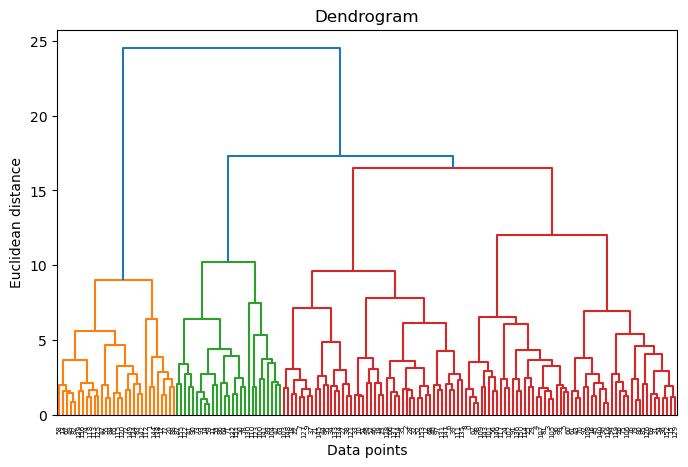

[0 3 1 0 0 0 1 1 0 1 1 2 1 3 2 0 0 3 1 1 3 1 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0
 1 1 1 1 2 2 0 1 0 1 3 1 3 2 1 1 2 0 3 0 1 3 2 0 0 0 2 2 3 1 3 1 0 0 2 3 2
 3 0 0 3 2 0 0 0 3 3 3 0 2 2 3 2 2 0 0 2 0 1 0 1 0 0 2 0 0 1 2 0 0 0 0 0 2
 1 3 3 0 3 0 0 3 0 3 1 2 2 3 3 0 1 1 0 2 1 2 1 1 1 0 1 3 3 0 2 3 0 3 1 0 1
 1 3 0 2 0 1 1 2 3]


In [43]:
#2.1
df = pd.read_csv("lpga.csv")

del df['Golfer']
del df['Id']

scaler = StandardScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

distance_matrix = shc.distance.pdist(normalized_df)

linkage = shc.linkage(distance_matrix, method='ward', metric="euclidean")

plt.figure(figsize=(8, 5))
dendrogram = shc.dendrogram(linkage, labels=normalized_df.index, orientation='top')
plt.title('Dendrogram')
plt.ylabel('Euclidean distance')
plt.xlabel('Data points')
plt.show()

model = AgglomerativeClustering(n_clusters=4, linkage='ward', metric='euclidean')

model.fit(normalized_df)

cluster_labels = model.labels_
print(cluster_labels)

#2.2

Agglomerative clustering is a bottom-up approach. Each observation starts in its own cluster then as distance between clusters decreases, we group them together.

Divisive on the other hand it a top-down approach. Where all observations start in the same cluster, and as distance increases, we split the cluster into seperate groups.